# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13849999690428377


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
import random 
import torch 

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent 
from unityagents import UnityEnvironment 
from collections import deque 


In [8]:
# a helper to plot a training scores
def plot_scores( n_episode ,scores, 
                color = 'b', 
                title = '', 
                linestyle = '-',
                xlabel='Episode',
                ylabel='Score',
                fig = None, 
                axes = None, 
                showRequirement = True ) :
    # iteration indices (recall, smoothed start at step 100)
    x = range(1, n_episode+1) #scores[0]
    y = scores
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
    
    axes.grid( True )
    axes.plot( x, y, color = color, linestyle = linestyle )
    axes.set_title( title )
    
    # if scores plot, then plot the requirement
    if showRequirement :
        axes.axhline( 30., linestyle = '--' )
    
    axes.set_xlabel( xlabel )
    axes.set_ylabel( ylabel )
    
    return fig, axes

In [9]:
import requests
import time
from ddpg_agent import Agent 

# DDPG function 
def ddpg(agent, n_episodes=1000, max_t=300, print_every=1, required_episode=110):
    all_scores = []
    scores_local = deque(maxlen=100)
    mean_scores = []
    local_mean_scores = [] 
    
    old_time = time.time()
    response = requests.request("GET", 
                            "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
                            headers={"Metadata-Flavor":"Google"})
    solved_at = -1 
    for i_episode in range(1, n_episodes+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            requests.request("POST", 
                             "https://nebula.udacity.com/api/v1/remote/keep-alive", 
                             headers={'Authorization': "STAR " + response.text})
            
        env_info = env.reset(train_mode=True)[brain_name] # reset environment 
        states = env_info.vector_observations # current state for the observations 
        # scores = np.zeros(num_ag)
        agent.reset()
        scores = np.zeros(num_agents)  
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)
            states = next_states
            scores += rewards 
            if np.any(dones):
                break
            
            #agent.step(state, action, reward, next_state, done)
            #state = next_state
            #score += reward
            #if done:
            #    break 
        time_cost = time.time() - start_time
        mean_score_episode = np.mean(scores)
        all_scores.append(mean_score_episode)
        scores_local.append(mean_score_episode)
        mean_scores.append(np.mean(all_scores))
        local_mean_scores.append(np.mean(scores_local))
        if i_episode % print_every == 0:   
            print('\n\rEpisode {} \tcost {}(S) \tCurrent Score: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, int(time_cost), mean_score_episode, local_mean_scores[-1]), end="")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            if local_mean_scores[-1] > 30:
                if solved_at < 0:
                    print('\n\rEnvironment solved in {} episodes with Average Score: {:.2f}'.format(i_episode, local_mean_scores[-1]))
                    solved_at = i_episode
        if i_episode >= required_episode:
            if solved_at > 0:
                print('\n\rFinish {} episodes the problem has been solved at {} episode '.format(required_episode ,solved_at))
            else:
                print('\n\rFinish {} episodes the problem has not been solved !'.format(required_episode))
            break
    return all_scores, local_mean_scores




Episode 1 	cost 113(S) 	Current Score: 0.59 	Average Score: 0.59
Episode 2 	cost 115(S) 	Current Score: 1.20 	Average Score: 0.90
Episode 3 	cost 116(S) 	Current Score: 3.07 	Average Score: 1.62
Episode 4 	cost 116(S) 	Current Score: 2.85 	Average Score: 1.93
Episode 5 	cost 117(S) 	Current Score: 6.63 	Average Score: 2.87
Episode 6 	cost 117(S) 	Current Score: 7.53 	Average Score: 3.65
Episode 7 	cost 118(S) 	Current Score: 9.58 	Average Score: 4.49
Episode 8 	cost 118(S) 	Current Score: 11.64 	Average Score: 5.39
Episode 9 	cost 118(S) 	Current Score: 13.05 	Average Score: 6.24
Episode 10 	cost 116(S) 	Current Score: 16.84 	Average Score: 7.30
Episode 11 	cost 117(S) 	Current Score: 21.54 	Average Score: 8.59
Episode 12 	cost 118(S) 	Current Score: 22.30 	Average Score: 9.74
Episode 13 	cost 118(S) 	Current Score: 26.04 	Average Score: 10.99
Episode 14 	cost 117(S) 	Current Score: 27.86 	Average Score: 12.19
Episode 15 	cost 117(S) 	Current Score: 31.56 	Average Score: 13.49
Episode

(<matplotlib.figure.Figure at 0x7fccc46c5a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccc30fcf60>)

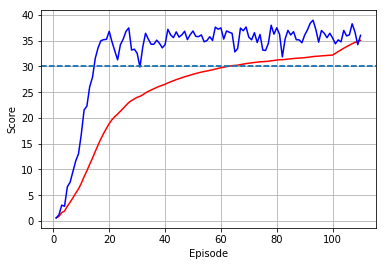

In [10]:
agent = Agent(state_size = state_size, action_size=action_size, random_seed = 7) 
all_scores, local_mean_scores = ddpg(agent, n_episodes=120, max_t=1000, required_episode=110)

fig, axes = plot_scores(n_episode=len(local_mean_scores), scores=local_mean_scores, color='r')
plot_scores(n_episode=len(all_scores), scores=all_scores, color='b', fig=fig, axes=axes)


In [9]:


fig, axes = plot_scores(n_episode=len(local_mean_scores), scores=local_mean_scores, color='b')
plot_scores(n_episode=len(all_scores), scores=all_scores, color='r', fig=fig, axes=axes)


Episode 1 	cost 106(S) 	Current Score: 0.69 	Average Score: 0.69
Episode 2 	cost 107(S) 	Current Score: 0.77 	Average Score: 0.73
Episode 3 	cost 108(S) 	Current Score: 0.91 	Average Score: 0.79
Episode 4 	cost 109(S) 	Current Score: 0.66 	Average Score: 0.76
Episode 5 	cost 110(S) 	Current Score: 0.99 	Average Score: 0.80
Episode 6 	cost 109(S) 	Current Score: 1.21 	Average Score: 0.87
Episode 7 	cost 110(S) 	Current Score: 1.28 	Average Score: 0.93
Episode 8 	cost 110(S) 	Current Score: 1.73 	Average Score: 1.03
Episode 9 	cost 110(S) 	Current Score: 1.65 	Average Score: 1.10
Episode 10 	cost 110(S) 	Current Score: 1.35 	Average Score: 1.12
Episode 11 	cost 110(S) 	Current Score: 1.10 	Average Score: 1.12
Episode 12 	cost 110(S) 	Current Score: 1.11 	Average Score: 1.12
Episode 13 	cost 110(S) 	Current Score: 1.00 	Average Score: 1.11
Episode 14 	cost 109(S) 	Current Score: 0.77 	Average Score: 1.09
Episode 15 	cost 109(S) 	Current Score: 0.71 	Average Score: 1.06
Episode 16 	cost 1

KeyboardInterrupt: 

(<matplotlib.figure.Figure at 0x7fe10db7f898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe0c72aada0>)

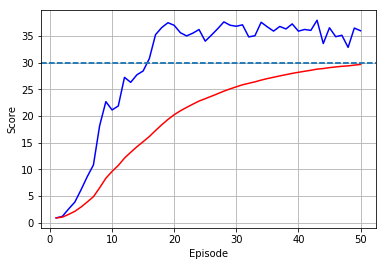

In [14]:
fig, axes = plot_scores(n_episode=len(local_mean_scores), scores=local_mean_scores, color='b')
plot_scores(n_episode=len(all_mean_scores), scores=all_mean_scores, color='r', fig=fig, axes=axes)

In [ ]:
env.close()